# Assignment 1 2024

In this assignment, you will be asked to implement popular CNN architectures to solve a popular image classification problem, Fashion MNIST. Your codes must be written in Tensorflow and be executable under Google colab. You will need a GPU access where Google colab gives you such access free of charge. Your report can be written in the same document as your codes in .ipynb file. Every step carries a particular mark indicated in every instruction. Full mark is 140 points.

### 1. Import relevant libraries that you need [10 marks]

##### list all the libraries that you need here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.applications import ResNet50, VGG16
from skimage.transform import resize

### 2. Download the fashion MNIST dataset [5 marks]

##### The fashion MNIST dataset is available in the tensorflow. You can download it directly.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### 3. Visualize the dataset that has been downloaded. Yo need to plot the dataset in a batch and present them as a batch [10 marks]

##### Present your plot as a grid of images.

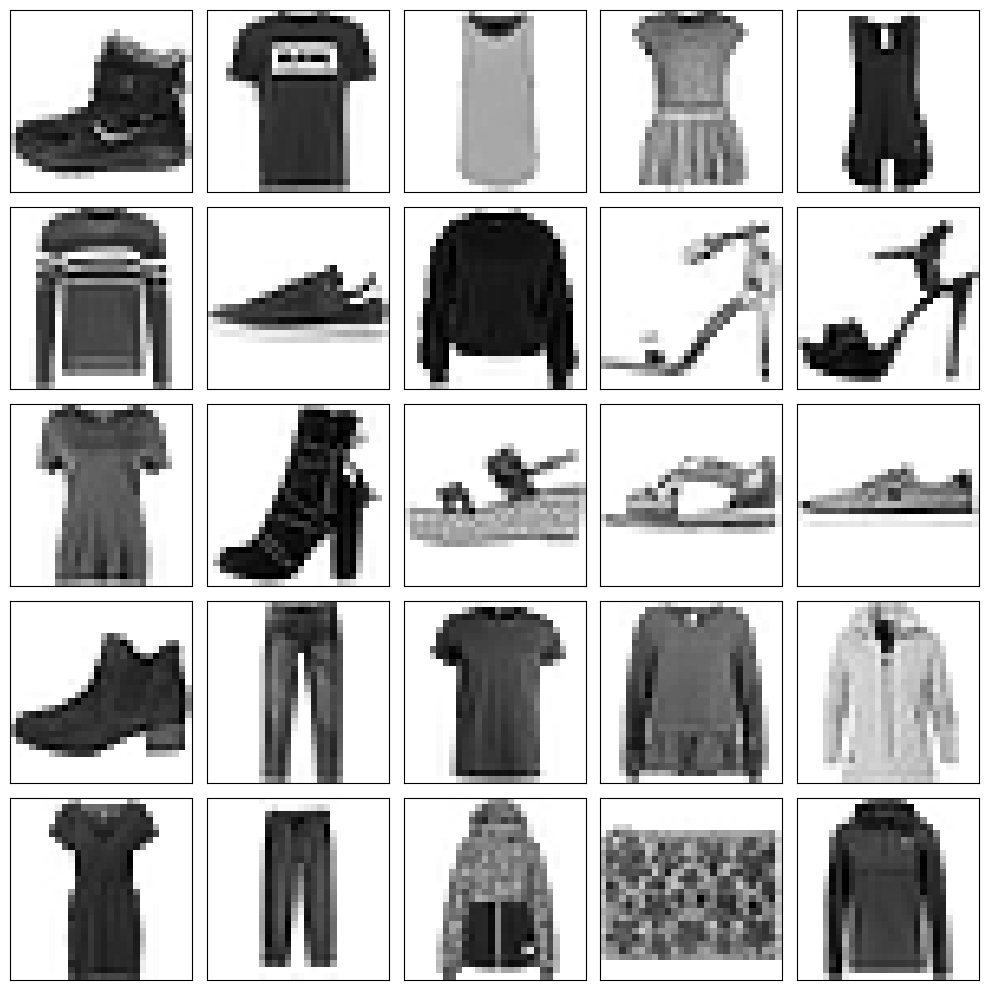

In [3]:
# Function to display a batch of images
def plot_batch(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
    plt.tight_layout()
    plt.show()

# Visualize the first 25 images from the training set
plot_batch(X_train[:25], y_train[:25])

### 4. Normalize the dataset into the range of $[0,1]$ [5 marks]


##### Normalization can be done by dividing with the maximum element.

In [4]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape, X_train.min(), X_train.max()

((60000, 28, 28), 0.0, 1.0)

### 5. Create two hidden layer neural networks where each hidden layer comprises 128 nodes [10 marks]

##### The neural network can be built and customized from the keras library.

In [5]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


model = Sequential()

model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
  # Hidden layer 2
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
  # Output layer
model.add(Dense(10))
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### 6. Create the training environments to train the neural network created in the previous cell. Use cross entropy loss function and ADAM optimizer [5 marks].

##### The training environment can be created from model.compile() instruction.

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Train the network for 10 epochs with the batch size of 64 and validation split of 0.2. Training is performed under GPU [10 marks].

##### The network training process can be done using model.fit() instruction.

In [7]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7315 - loss: 0.7666 - val_accuracy: 0.8385 - val_loss: 0.4233
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.4229 - val_accuracy: 0.8601 - val_loss: 0.3843
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8615 - loss: 0.3817 - val_accuracy: 0.8678 - val_loss: 0.3612
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3519 - val_accuracy: 0.8736 - val_loss: 0.3510
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8764 - loss: 0.3350 - val_accuracy: 0.8798 - val_loss: 0.3377
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3325 - val_accuracy: 0.8806 - val_loss: 0.3287
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8851 - loss: 0.3074 - val_accuracy: 0.8789 - val_loss: 0.3278
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.3056 - val_accuracy: 0.

### 8. Evaluate the model on the testing dataset and calculate the prediction accuracy [5 marks].

##### The evaluation can be done using model.evaluate() instruction.

In [8]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8742 - loss: 0.3508


[0.3508938252925873, 0.8755999803543091]

### 9. Rescale the dataset to the size of $32×32$ [10 marks].




##### One way to rescale the image is through skimage.

In [9]:
X_train_resized = np.array([resize(image, (32, 32)) for image in X_train])
X_test_resized = np.array([resize(image, (32, 32)) for image in X_test])

### 10. Create ResNet50 Structure (https://arxiv.org/abs/1512.03385) [10 marks].




##### The resNet structure is readily available in the tensorflow library.

In [10]:
model_resnet = ResNet50(
    include_top=True,
    input_shape=(32, 32, 1),
    weights=None,
    classes=10
)

### 11. Create the training environment to train the ResNet50 based on the ResNet structure in the previous step. Use the cross entropy loss function and the ADAM optimizer [5 marks].

##### As with question 6, the training environments can be set by model.compile() instruction.

In [11]:
model_resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 12. Train the ResNet50 for 10 epochs with the batch size of 64 and validation split of 0.2. Training is performed under GPU [10 marks].

##### As with question 7, the training process can be executed by model.fit() instruction.

In [12]:
history_resnet = model_resnet.fit(X_train_resized, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 90s 43ms/step - accuracy: 0.6183 - loss: 1.2343 - val_accuracy: 0.4893 - val_loss: 1.6028
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.6696 - loss: 1.0154 - val_accuracy: 0.6271 - val_loss: 1.2083
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.7162 - loss: 0.8379 - val_accuracy: 0.4468 - val_loss: 1.7321
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.7451 - loss: 0.7447 - val_accuracy: 0.7035 - val_loss: 0.8353
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.7583 - loss: 0.7194 - val_accuracy: 0.5838 - val_loss: 1.1279
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.7727 - loss: 0.6550 - val_accuracy: 0.7266 - val_loss: 0.7731
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.7789 - loss: 0.6317 - val_accuracy: 0.5946 - val_loss: 1.2324
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.7391 - loss: 0.8182 - 

### 13. Evaluate the model on the testing dataset and calculate the prediction accuracy [5 marks].



As with question 8, the evaluation can be done via model.evaluate() instruction.

In [14]:
model_resnet.evaluate(X_test_resized, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6849 - loss: 0.8670


[0.8714652061462402, 0.6833000183105469]

### 14. Change your model to VGG16 (https://arxiv.org/abs/1409.1556v6) and repeat step 11 and 12 [20 marks].

##### VGG16 architecture is readily available from the tensorflow library.

In [ ]:
X_train_resized_vgg16 = X_train_resized.reshape(-1, 32, 32, 1)

model_vgg16 = VGG16(
    include_top=True,
    input_shape=(32, 32, 1),
    weights=None,
    classes=10
)
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_resnet = model_vgg16.fit(X_train_resized, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
495/750 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.0974 - loss: 2.3032

### 15. Evaluate the trained VGG16 model on the testing dataset [5 marks].



##### Evaluation can be done in the same way as above. You need to pay attention to the testing dataset to be used for evaluation.

In [18]:
X_test_resized_vgg16 = X_test_resized.reshape(-1, 32, 32, 1)
model_vgg16.evaluate(X_test_resized, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0998 - loss: 2.3027


[2.302647352218628, 0.10000000149011612]

### 16. Explain why the VGG16 does not perform as good as other two architectures [15 marks]. Your answer is written in this document.

In [ ]:
#### Write your answer here